# Mandatory 1 
Karl Jacobsen

In [301]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style="white", context="notebook", font_scale=1.5,
            rc={"axes.grid": True, "legend.frameon": False,
"lines.markeredgewidth": 1.4, "lines.markersize": 10})
import itertools as it
import pandas as pd
import time
import random

In [30]:
# Import data
df = pd.read_csv( "european_cities.csv", sep=';')
print(df)

    Barcelona  Belgrade   Berlin  Brussels  Bucharest  Budapest  Copenhagen  \
0        0.00   1528.13  1497.61   1062.89    1968.42   1498.79     1757.54   
1     1528.13      0.00   999.25   1372.59     447.34    316.41     1327.24   
2     1497.61    999.25     0.00    651.62    1293.40    689.06      354.03   
3     1062.89   1372.59   651.62      0.00    1769.69   1131.52      766.67   
4     1968.42    447.34  1293.40   1769.69       0.00    639.77     1571.54   
5     1498.79    316.41   689.06   1131.52     639.77      0.00     1011.31   
6     1757.54   1327.24   354.03    766.67    1571.54   1011.31        0.00   
7     1469.29   2145.39  1315.16    773.20    2534.72   1894.95     1238.38   
8     1471.78   1229.93   254.51    489.76    1544.17    927.92      287.97   
9     2230.42    809.48  1735.01   2178.85     445.62   1064.76     2017.17   
10    2391.06    976.02  1204.00   1836.20     744.44    894.29     1326.33   
11    1137.67   1688.97   929.97    318.72    2088.4

In [195]:
# Create city name array
cityNames = np.asarray(list(df))
print(cityNames[0:3])

['Barcelona' 'Belgrade' 'Berlin']


In [658]:
class TSP:
    def __init__(self):
        self.a = a
    
    def exhaustive(self, cities):
        startTime = time.time()
        alternativesTemporary = list(it.permutations(cities[1:], len(cities) - 1)) # Leave out 1st city as trick
        alternatives = []
        for i in range(len(alternativesTemporary)):
            templist = [cities[0]]
            for j in range(len(alternativesTemporary[0])):
                templist.append(alternativesTemporary[i][j])
            templist.append(templist[0])
            alternatives.append(templist)
            
        bestSolutionLength = 1e9
        for alternative in alternatives:
            length = 0
            for city1, city2 in zip(alternative[:-1], alternative[1:]):
                indexNumberCity2 = np.concatenate(np.where(cityNames == city2))                
                length += df[city1][indexNumberCity2].values                
        
            if length < bestSolutionLength:
                bestSolutionLength = length
                bestSolution = alternative
        endTime = time.time()
        timeUsed = endTime - startTime

        return bestSolution, bestSolutionLength, timeUsed
    
    
    def greedy(self, cities):
        startTime = time.time()
        route = []
        startCity = random.choice(cities)
        route.append(startCity)
        index2Delete = np.argwhere(cities==startCity)
        remainingCities = np.delete(cities, index2Delete)
        distance = 0
        while remainingCities.size:
            if len(remainingCities) != 1:
                alternativeCities = random.sample(set(remainingCities), 2)
                candidateIndices = np.zeros(len(alternativeCities))
                lengths = np.zeros_like(candidateIndices)

                for candidate in range(len(alternativeCities)):
                    candidateIndices[candidate] = np.concatenate(np.where(cityNames == alternativeCities[candidate]))
                    lengths[candidate] = df[route[-1]][candidateIndices[candidate]]#.values

                if lengths[0] > lengths[1]:
                    nextCity = alternativeCities[0]
                    nextLength = lengths[0]
                else:
                    nextCity = alternativeCities[1]
                    nextLength = lengths[1]

                route.append(nextCity)
                index2Delete = np.argwhere(remainingCities==nextCity)
                remainingCities = np.delete(remainingCities, index2Delete)
                distance += nextLength

            else:
                nextCity = remainingCities[0]
                candidateIndex = np.concatenate(np.where(cityNames == nextCity))
                nextLength = df[route[-1]][candidateIndex].values
                distance += nextLength
                route.append(nextCity)
                remainingCities = np.array(())
        startCityIndex = np.concatenate(np.argwhere(cityNames==startCity))
        nextLength = df[route[-1]][startCityIndex].values
        distance += nextLength
        route.append(startCity)
        
        endTime = time.time()
        timeUsed = endTime - startTime

        return route, distance, timeUsed
    
    def calculateDistance(self, cityOrder):
        distanceTravelled = 0
        for loopCounter, cityNumber in zip(range(len(cityOrder[:-1])), cityOrder[:-1]):
            #print('\n', cityNumber)
            distanceTravelled += df[cityNames[cityNumber]][cityOrder[loopCounter+1]]
            #print('\n', distanceTravelled)
            #print('\n', cityNames[cityNumber], cityNames[cityOrder[loopCounter+1]] )
            #print('\n', distanceTravelled)
        distanceTravelled += df[cityNames[cityOrder[loopCounter+1]]][cityOrder[0]]
        return distanceTravelled
    
    

# Exhaustive search

 Solution ['Barcelona', 'Belgrade', 'Barcelona'] 
 Distance [3056.26] 
 Time  0.0013589859008789062 

 Solution ['Barcelona', 'Belgrade', 'Berlin', 'Barcelona'] 
 Distance [4024.99] 
 Time  0.0028569698333740234 

 Solution ['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Barcelona'] 
 Distance [4241.89] 
 Time  0.012928485870361328 

 Solution ['Barcelona', 'Belgrade', 'Bucharest', 'Berlin', 'Brussels', 'Barcelona'] 
 Distance [4983.38] 
 Time  0.05276894569396973 

 Solution ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels', 'Barcelona'] 
 Distance [5018.81] 
 Time  0.2985877990722656 

 Solution ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Brussels', 'Barcelona'] 
 Distance [5487.89] 
 Time  2.050788164138794 

 Solution ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Brussels', 'Dublin', 'Barcelona'] 
 Distance [6667.49] 
 Time  16.803271532058716 

 Solution ['Barcelona', 'Belgrade', 'Bucharest', 'Bud

Text(0.5,0,'Number of cities')

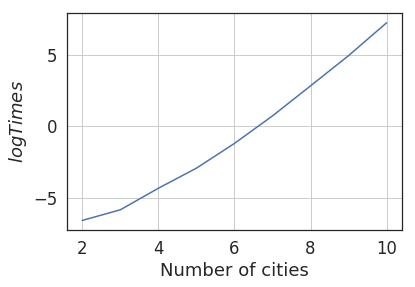

In [304]:
cityNumbers = []
times = []
maxNumberOfCities = 10
for numberOfCities in range(2,maxNumberOfCities+1):
    cityNumbers.append(numberOfCities)
    firstCities = numberOfCities
    cities = cityNames[0:firstCities]
    #print('\n input', cities)    
    a = TSP()
    sol, length, timeUsed = a.exhaustive(cities)
    print(' Solution', sol, '\n Distance', length, '\n Time ', timeUsed, '\n')
    times.append(timeUsed)
fig, ax = plt.subplots()
ax.plot(cityNumbers, np.log(times))
ax.set_ylabel(r'$log Times$')
ax.set_xlabel('Number of cities')

In [353]:
# Prediction of time when 20 cities
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

linreg = LinearRegression()
x = np.asarray(cityNumbers)
x=x[:,np.newaxis]
y = np.asarray(np.log(times))
XHat = np.c_[ x]
linreg.fit(XHat, y)
yPredictTraining = linreg.predict(x)
R2 = r2_score(y, yPredictTraining)

# Prediction
cityPredictor = 24
yPredict20Cities = linreg.predict(cityPredictor)
yPredictSeconds = np.exp(yPredict20Cities)
yPredictYears = yPredictSeconds/(60.*60*24*365*1e6)
print('Predicted solution time 24 cities: ', yPredictYears, 'million years. \n')
print('Training R2 score: %.3f' % R2)

[]


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

# Semi greedy (Shortest distance between 2 random cities)

In [659]:
maxNumberOfCitiesList = [10, 24]
for maxNumberOfCities in maxNumberOfCitiesList:
    cities = cityNames[0:maxNumberOfCities]

    numberOfSimulations = 20
    distances = np.zeros(numberOfSimulations)
    routes = []
    times = []
    hillC = TSP()

    for i in range(numberOfSimulations):
        route, distance, timeUsed = hillC.greedy(cities)
        routes.append(route)
        distances[i] = distance
        times.append(timeUsed)

    print('Number of cities: ', maxNumberOfCities)
    minDistance = np.min(distances)
    print('Minimum ', minDistance)
    maxDistance = np.max(distances)
    print('Maximum ', maxDistance)
    meanDistance = np.mean(distances)
    print('Mean ', meanDistance)
    stdDistance = np.std(distances)
    print('Std ', stdDistance)

    minDistanceIndex = np.concatenate(np.argwhere(distances == minDistance))
    print('Best route: ', routes[minDistanceIndex[0]], '\n')
    #print('Minimum time: ', times[minDistanceIndex[0]])

Number of cities:  10
Minimum  12891.850000000002
Maximum  15998.54
Mean  14923.651500000002
Std  911.0359120434
Best route:  ['Barcelona', 'Hamburg', 'Istanbul', 'Belgrade', 'Bucharest', 'Dublin', 'Budapest', 'Brussels', 'Copenhagen', 'Berlin', 'Barcelona'] 

Number of cities:  24
Minimum  33262.59
Maximum  38194.65
Mean  35926.824
Std  1200.4930239880603
Best route:  ['Sofia', 'Warsaw', 'Munich', 'Dublin', 'Brussels', 'Barcelona', 'Kiev', 'Paris', 'Copenhagen', 'Bucharest', 'Prague', 'Milan', 'Stockholm', 'Berlin', 'Rome', 'Hamburg', 'Saint Petersburg', 'Istanbul', 'Moscow', 'Belgrade', 'Madrid', 'Budapest', 'London', 'Vienna', 'Sofia'] 



The exhastive seach found a distance of 7 486 for 10 cities, while the semi greedy algorith had 12 079, 16453 and 14768 as min, max and mean over 20 runs. The distance increase by minimum 50 per centage when going from exhaustive search to the semi greedy algorith. <br>

The hill semi greedy algorith is extremely much faster than exhaustive search, solving the full problem in seconds, while the exhaustive search would take over a million years.

# Hill climbing

In [837]:
def hillClimber(nCities, numberOfSimulations):
    cityOrder = np.arange(nCities)
    np.random.shuffle(cityOrder)

    def calculateDistance(cityOrder):
        distanceTravelled = 0
        for loopCounter, cityNumber in zip(range(len(cityOrder[:-1])), cityOrder[:-1]):
            distanceTravelled += df[cityNames[cityNumber]][cityOrder[loopCounter+1]]
        distanceTravelled += df[cityNames[cityOrder[loopCounter+1]]][cityOrder[0]]
        return distanceTravelled

    distanceTravelled = calculateDistance(cityOrder)

    for i in range(numberOfSimulations):
        city1, city2 = random.sample(set(range(nCities)), 2)
        possibleCityOrder = cityOrder.copy()
        possibleCityOrder = np.where(possibleCityOrder==city1, -1, possibleCityOrder)
        possibleCityOrder = np.where(possibleCityOrder==city2, city1, possibleCityOrder)
        possibleCityOrder = np.where(possibleCityOrder==-1, city2, possibleCityOrder)
        newDistanceTravelled = calculateDistance(possibleCityOrder)

        if newDistanceTravelled < distanceTravelled:
            distanceTravelled = newDistanceTravelled
            cityOrder = possibleCityOrder
    return cityNames[cityOrder], distanceTravelled

# Simulate
np.random.seed(1)
maxNumberOfCitiesList = [10, 24]
numberOfSimulations = 10
numberOfRuns = 20

for numberOfCities in maxNumberOfCitiesList:
    routes = []
    distances = np.zeros(numberOfRuns)
    #times = []
    #hillC = TSP()

    for i in range(numberOfRuns):
        route, distance = hillClimber(numberOfCities, numberOfSimulations)
        routes.append(route)
        distances[i] = distance
        #times.append(timeUsed)

    print('Number of cities: ', numberOfCities)
    minDistance = np.min(distances)
    print('Minimum ', minDistance)
    maxDistance = np.max(distances)
    print('Maximum ', maxDistance)
    meanDistance = np.mean(distances)
    print('Mean ', meanDistance)
    stdDistance = np.std(distances)
    print('Std ', stdDistance)

    minDistanceIndex = np.concatenate(np.argwhere(distances == minDistance))
    print('Best route: ', routes[minDistanceIndex[0]], '\n')

Number of cities:  10
Minimum  8066.12
Maximum  13585.019999999999
Mean  10547.5795
Std  1119.5345902404042
Best route:  ['Bucharest' 'Belgrade' 'Budapest' 'Barcelona' 'Dublin' 'Brussels'
 'Hamburg' 'Berlin' 'Copenhagen' 'Istanbul'] 

Number of cities:  24
Minimum  24860.63
Maximum  33430.17
Mean  28839.768500000006
Std  2069.0094968203384
Best route:  ['Kiev' 'Stockholm' 'Copenhagen' 'Budapest' 'Belgrade' 'Istanbul' 'Rome'
 'Hamburg' 'Milan' 'Barcelona' 'Sofia' 'Bucharest' 'Berlin' 'Prague'
 'Madrid' 'Vienna' 'Warsaw' 'Brussels' 'Dublin' 'London' 'Paris'
 'Saint Petersburg' 'Moscow' 'Munich'] 



For ten cities, the min, max and mean distances are 8 822, 12 816 and 10 552 for the Hillclimber, while the exhaustive serach gave 7 486 as shortest distance. In average the hill climber misses by approximately 50 per cent.<br>

The hill climber solved both 10 and 24 cities together in about 1 second. In comparison the exhaustive search would have used one million years on this, and the exhaustive searched used 23 minutes on the 10 cities problem. <br>

We note that the results depend on the nummer of inner simulations applied in the hillclimber function. This is a different variable than total number of runs. Increasing the number of inner simulations, the standard deviation would decrease.

# GA

In [1184]:
class GA:
    
    def __init__(self, populationSize, numberOfCities, hybrid=False):
        self.populationSize, self.numberOfCities, self.hybrid = populationSize, numberOfCities, hybrid
        self.population = np.zeros((self.populationSize, self.numberOfCities))
        #print('self.population', self.population)
        for counter in range(self.populationSize):
            self.population[counter][:] = np.arange(self.numberOfCities)
            np.random.shuffle(self.population[counter][:])
        #print('\n self.population', self.population)
        #return self.population
        
    def simulate(self, numberOfGenerations):
        generationBest = []
        for counter in range(numberOfGenerations):
            #print('INSIDE Generation nr ', counter+1)
            pairs = self.parentSelection()
            children = self.orderCrossover(pairs)
            self.population, distances, self.bestIndividual, minimumValue, bestIndividualNames = \
            self.survivalSelection()
            generationBest.append(minimumValue)
        return self.population, distances, self.bestIndividual, minimumValue, bestIndividualNames, generationBest
      
    def parentSelection(self, parentSelectionType='random'):
        if parentSelectionType == 'random':
            self.potentialParentsIndices = random.sample(set(range(self.populationSize)), \
                                                         int(round(self.populationSize/2)))
        #print('\n', self.population, '\n', self.potentialParents, '\n', self.population[self.potentialParents][:])
        self.potentialParents = self.population[self.potentialParentsIndices ][:]
        self.pairIndices = []
        for counter in range(len(self.potentialParentsIndices)):
            self.pairIndices.append(random.sample(set(self.potentialParentsIndices), 2))
        #self.parents = self.
        return self.pairIndices  
    
    def orderCrossover(self, parents):
        self.children = np.zeros((len(parents), self.numberOfCities))
        for childCounter in range(len(parents)):
            #print('\n parents[childCounter]', parents[childCounter])
            p1, p2 = self.population[parents[childCounter][0]][:], self.population[parents[childCounter][1]][:]#np.asarray(parents[0]), np.asarray(parents[1])
            p1, p2 = np.asarray(p1), np.asarray(p2)
            startPosition, stopPosition = int(np.round(self.numberOfCities/2-2)), int(np.round(self.numberOfCities/2+2))

            c = np.zeros(len(p1))
            c[startPosition:stopPosition] = p1[startPosition:stopPosition]

            #indexArray = np.arange(len(c))
            indexArray = list(range(len(c)))

            #remainingPositions = np.concatenate([indexArray[stopPosition:], indexArray[0:startPosition]])
            remainingPositions = indexArray[stopPosition:] + indexArray[0:startPosition]
            #coveredPositions = np.arange(startPosition, stopPosition)
            coveredPositions = list(np.arange(startPosition, stopPosition))
            #p2TryIndices =  np.concatenate([remainingPositions, coveredPositions])
            p2TryIndices =  remainingPositions + coveredPositions
            #print('\n p2TryIndices', p2TryIndices)

            newPositionNumber = 0
            for position in remainingPositions:
                tryIndex = newPositionNumber
                #print('\n tryIndex before ', tryIndex, 'p2TryIndices', p2TryIndices)
                #print('\n p2[p2TryIndices[tryIndex]]', p2[p2TryIndices[tryIndex]], '\n c', c)
                #if (p2TryIndices[tryIndex] < len(p2)):
                    #print('\n p2TryIndices[tryIndex] ', p2TryIndices[tryIndex] , 'len(p2)', len(p2))
                while p2[p2TryIndices[tryIndex]] in c and (tryIndex + 1) < len(p2TryIndices):
                    tryIndex += 1
                #print('\n tryIndex ', tryIndex)
                if p2[p2TryIndices[tryIndex]] not in c:
                    c[position] = p2[p2TryIndices[tryIndex]] 
                newPositionNumber +=1
            self.children[childCounter][:] = c
        return self.children
    
    def survivalSelection(self):
        #print('TESTING children: ', self.children)
        #print('TESTING children: ', self.children)
       
        if hybrid:
            numberOfTries = 4 # For hillclimber
            numberOfChildren = np.shape(self.children)[0]
            modifiedChildren = np.zeros((numberOfChildren, self.numberOfCities ))
            distanceModifiedChild = np.zeros(numberOfChildren)
            for child in range(numberOfChildren):
                #print('\n self.children[child,:]', self.children[child,:])
                modifiedChildren[child,:], distanceModifiedChild[child] = \
                self.hillclimber(numberOfTries, self.children[child,:])
            #print('TESTING mod children, distances', modifiedChildren, distanceModifiedChild)
            if self.hybrid == 'Lamarck':
                self.children = modifiedChildren
                #print('TESTING Lamarck activated')
        
            totalPopulationBaldwin = np.concatenate((self.population, modifiedChildren), 0)
        
        totalPopulation = np.concatenate((self.population, self.children), 0)
        #print('totalPopulation', totalPopulation)
        

        totalPopulationSize = np.shape(totalPopulation)[0]
        distances = []
        #print('totalPopulationSize ', totalPopulationSize)
        for individuals in range(totalPopulationSize):
            cityOrder = np.asarray(totalPopulation[individuals])
            distanceTravelled = 0
            for loopCounter, cityNumber in zip(range(len(cityOrder[:-1])), cityOrder[:-1]):
                distanceTravelled += df[cityNames[int(cityNumber)]][cityOrder[loopCounter+1]]
            distanceTravelled += df[cityNames[int(cityOrder[loopCounter+1])]][int(cityOrder[0])]
            distances.append(distanceTravelled)
            
        if self.hybrid == 'Baldwin':
            distancesBaldwin = []
            for individuals in range(totalPopulationSize):
                cityOrder = np.asarray(totalPopulationBaldwin[individuals])
                distanceTravelled = 0
                for loopCounter, cityNumber in zip(range(len(cityOrder[:-1])), cityOrder[:-1]):
                    distanceTravelled += df[cityNames[int(cityNumber)]][cityOrder[loopCounter+1]]
                distanceTravelled += df[cityNames[int(cityOrder[loopCounter+1])]][int(cityOrder[0])]
                distancesBaldwin.append(distanceTravelled)
            #print('TEST distances ', distances)
            
            #print('TEST distancesBaldwin', distancesBaldwin)
            order = np.asarray(distancesBaldwin).argsort()
            ranks = order.argsort()
            minimumIndexBaldwin = np.where(ranks == 0)
        
        order = np.asarray(distances).argsort()
        ranks = order.argsort()
        surviverIndices = np.where(ranks < self.populationSize)
        minimumIndex = np.where(ranks == 0)
        #print('min index ', minimumIndex)
        #print('minimumValue ', minimumValue)
        
        #print('population before survival \n', self.population)
        #print('totalPopulation \n', totalPopulation)
        #print('totalPopulation[surviverIndices] \n')
        
        self.population = totalPopulation[surviverIndices]
        self.bestIndividual = np.concatenate(totalPopulation[minimumIndex])
        self.bestIndividual  = self.bestIndividual.astype(int)
        #print('\n self best', self.bestIndividual)
        #print('\n self pop ', self.population)
        bestIndividualNames = cityNames[self.bestIndividual]
        
        distances = np.asarray(distances)
        minimumValue = distances[minimumIndex]
        distances = distances[surviverIndices]

        if self.hybrid == 'Baldwin':
            minimumIndexBaldwin2 = np.concatenate(minimumIndexBaldwin)[0]
            minimumValue = distancesBaldwin[minimumIndexBaldwin2]
            self.bestIndividual = np.concatenate(totalPopulationBaldwin[minimumIndexBaldwin])
        
        return self.population, distances, self.bestIndividual, minimumValue, bestIndividualNames
    
    def hillclimber(self, numberOfTries, cityOrder):
        distanceTravelled = self.calculateDistance(cityOrder)
        nCities = self.numberOfCities
        for i in range(numberOfTries):
            city1, city2 = random.sample(set(range(nCities)), 2)
            possibleCityOrder = cityOrder.copy()
            possibleCityOrder = np.where(possibleCityOrder==city1, -1, possibleCityOrder)
            possibleCityOrder = np.where(possibleCityOrder==city2, city1, possibleCityOrder)
            possibleCityOrder = np.where(possibleCityOrder==-1, city2, possibleCityOrder)
            newDistanceTravelled = self.calculateDistance(possibleCityOrder)

            if newDistanceTravelled < distanceTravelled:
                distanceTravelled = newDistanceTravelled
                cityOrder = possibleCityOrder
        cityOrder = cityOrder.astype(int)
        #print('TESTING cityOrder ', cityOrder)
        return cityOrder, distanceTravelled#cityNames[cityOrder], distanceTravelled

    def calculateDistance(self, cityOrder):
        """ For hillclimbing"""
        distanceTravelled = 0
        #cityOrder = list(cityOrder)
        for loopCounter, cityNumber in zip(range(len(cityOrder[:-1])), cityOrder[:-1]):
            #print('TESTING In loop', loopCounter, cityNumber)
            distanceTravelled += df[cityNames[int(cityNumber)]][int(cityOrder[loopCounter+1])]
            #print('TESTING In loop AFTER +=',)
        #print('TESTING out of loop')
        distanceTravelled += df[cityNames[int(cityOrder[loopCounter+1])]][int(cityOrder[0])]
        return distanceTravelled

#################################### False ###################################################
#Number of cities:  10
# PopulationSize:  5
Number of generations:  20
Minimum minimum over all runs  9534.42
Maximum minimum over all runs  11939.640000000001
Mean minimum over all runs  10435.253
Std minimum over all runs  712.8423423597962
Best route over all runs : 
 ['Brussels' 'Dublin' 'Barcelona' 'Copenhagen' 'Bucharest' 'Istanbul'
 'Budapest' 'Belgrade' 'Hamburg' 'Berlin'] 

# PopulationSize:  10
Number of generations:  20
Minimum minimum over all runs  8265.27
Maximum minimum over all runs  11193.29
Mean minimum over all runs  9645.6365
Std minimum over all runs  758.3742262911828
Best route over all runs : 
 ['Dublin' 'Brussels' 'Barcelona' 'Belgrade' 'Budapest' 'Istanbul'
 'Bucharest' 'Berlin' 'Hamburg' 'Copenhagen'] 

#Number of cities:  24
# PopulationSize:  5
Number of generations:  20
Minimum minimum over all runs  23974.35
Maximum minimum over all runs  31078.15
Mean minimum o

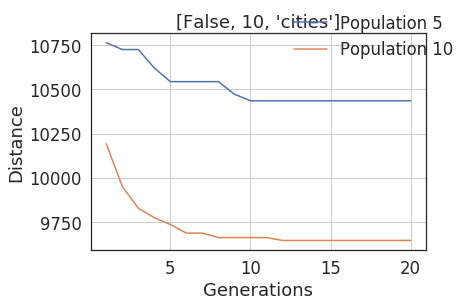

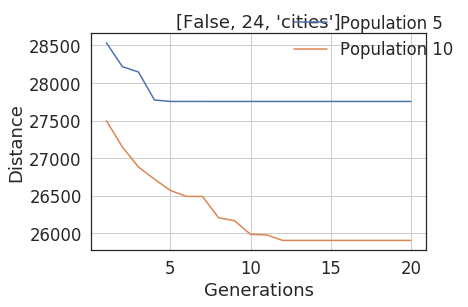

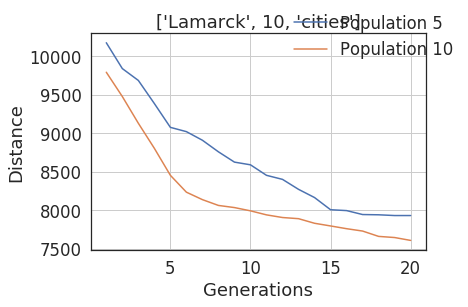

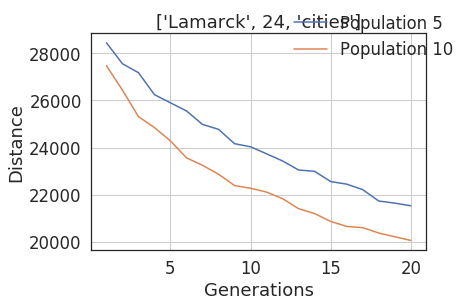

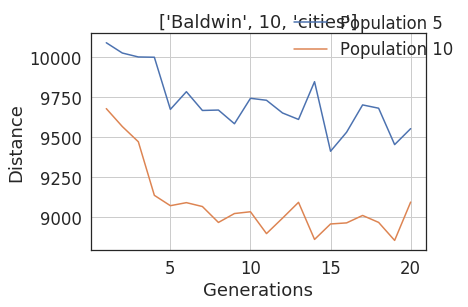

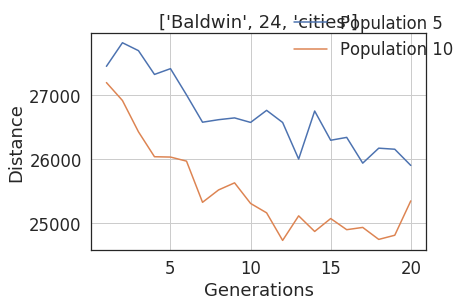

In [1199]:
# Hybrid testing
hybrid = 'Baldwin'
#hybrid = 'Lamarck'
populationSizes = 5, 10#, 20, 40, 80, 160
cityAlternatives = 10, 24
models = False, 'Lamarck', 'Baldwin'
for hybrid in models: 
    print('####################################', hybrid, '###################################################')
    for numberOfCities in cityAlternatives:
        print('#Number of cities: ', numberOfCities)
        generationalAveragesAllPopulations = []
        for populationSize in populationSizes:

            #populationSize = 8
            #numberOfCities = 10
            numberOfGenerations = 20
            smallesDistances = []
            runs = 20
            distances = []
            bestTours = []

            generationArray = np.zeros((runs, numberOfGenerations))
            for runCounter in range(runs):
                ga2 = GA(populationSize, numberOfCities, hybrid)
                survivalPopulation, distancesOrg, bestIndividual, minimumValue, bestIndividualNames, generationBest = \
                ga2.simulate(numberOfGenerations)
                for generations in range(numberOfGenerations):
                    generationArray[runCounter][generations] = generationBest[generations]
                #print('\n Pop ', survivalPopulation, '\n distances', distances, '\n best ', bestIndividual, '\n minimumValue', \
                #     minimumValue, '\n bestIndividualNames', dualNames)
                distances.append(minimumValue)
                #print('minimumValue', minimumValue)
                bestTours.append(bestIndividualNames)

            #print('\n Generation array', generationArray)

            generationalAverageOverRuns = np.zeros(numberOfGenerations)
            #print('size generationArray: ', np.shape(generationArray))
            for generation in range(numberOfGenerations):
                generationalAverageOverRuns[generation] = np.average(generationArray[:,generation])
            generationalAveragesAllPopulations.append(generationalAverageOverRuns)

            print('# PopulationSize: ', populationSize)
            print('Number of generations: ', numberOfGenerations)
            minDistance = np.min(distances)
            print('Minimum minimum over all runs ', minDistance)
            maxDistance = np.max(distances)
            print('Maximum minimum over all runs ', maxDistance)
            meanDistance = np.mean(distances)
            print('Mean minimum over all runs ', meanDistance)
            stdDistance = np.std(distances)
            print('Std minimum over all runs ', stdDistance)
            minDistanceIndex = np.concatenate(np.argwhere(distances == minDistance))
            print('Best route over all runs : \n', bestTours[minDistanceIndex[0]], '\n')    
            #print('\n generationalAverageOverRuns \n', generationalAverageOverRuns, '\n')
            #print('Population last run (1 individual per row): \n', survivalPopulation, '\n')    
            #print('\n TESTING routes: ', routes, '\n')
        fig, ax = plt.subplots()
        for populationSetting in range(len(populationSizes)):
            ax.plot(np.arange(1, numberOfGenerations+1), generationalAveragesAllPopulations[populationSetting], \
                   label='Population %d' % populationSizes[populationSetting])

        fig.legend()
        ax.set_xlabel('Generations')
        ax.set_ylabel('Distance')
        #ax.set_title('Lowest distance per generation \n averaged over runs')
        ax.set_title([hybrid, numberOfCities, 'cities'])#, '\n', 'Cities: ', numberOfCities)

############################################Number of cities:  10 #################################################
########################## PopulationSize:  5 ##########################
Number of generations:  20
Minimum minimum over all runs  8724.02
Maximum minimum over all runs  12003.43
Mean minimum over all runs  10447.664999999999
Std minimum over all runs  905.1726309632877
Best route over all runs : 
 ['Budapest' 'Bucharest' 'Istanbul' 'Belgrade' 'Berlin' 'Dublin'
 'Barcelona' 'Brussels' 'Copenhagen' 'Hamburg'] 

########################## PopulationSize:  10 ##########################
Number of generations:  20
Minimum minimum over all runs  8636.65
Maximum minimum over all runs  10788.300000000001
Mean minimum over all runs  9571.653
Std minimum over all runs  602.966914797985
Best route over all runs : 
 ['Brussels' 'Dublin' 'Barcelona' 'Copenhagen' 'Berlin' 'Bucharest'
 'Istanbul' 'Belgrade' 'Budapest' 'Hamburg'] 

############################################Number of ci

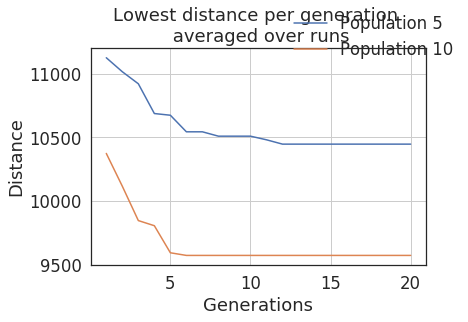

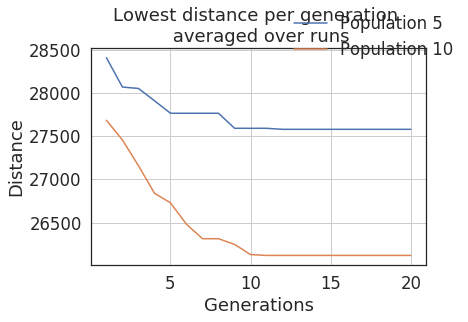

In [1195]:
#GA

populationSizes = 5, 10#, 20, 40, 80, 160
cityAlternatives = 10, 24
for numberOfCities in cityAlternatives:
    print('############################################Number of cities: ', numberOfCities, '#################################################')
    generationalAveragesAllPopulations = []
    for populationSize in populationSizes:

        #populationSize = 8
        #numberOfCities = 10
        numberOfGenerations = 20
        smallesDistances = []
        runs = 20
        distances = []
        bestTours = []

        generationArray = np.zeros((runs, numberOfGenerations))
        for runCounter in range(runs):
            ga2 = GA(populationSize, numberOfCities)
            survivalPopulation, distancesOrg, bestIndividual, minimumValue, bestIndividualNames, generationBest = \
            ga2.simulate(numberOfGenerations)
            for generations in range(numberOfGenerations):
                generationArray[runCounter][generations] = generationBest[generations]
            #print('\n Pop ', survivalPopulation, '\n distances', distances, '\n best ', bestIndividual, '\n minimumValue', \
            #     minimumValue, '\n bestIndividualNames', bestIndividualNames)
            distances.append(minimumValue)
            #print('minimumValue', minimumValue)
            bestTours.append(bestIndividualNames)

        #print('\n Generation array', generationArray)

        generationalAverageOverRuns = np.zeros(numberOfGenerations)
        #print('size generationArray: ', np.shape(generationArray))
        for generation in range(numberOfGenerations):
            generationalAverageOverRuns[generation] = np.average(generationArray[:,generation])
        generationalAveragesAllPopulations.append(generationalAverageOverRuns)

        print('########################## PopulationSize: ', populationSize, '##########################')
        print('Number of generations: ', numberOfGenerations)
        minDistance = np.min(distances)
        print('Minimum minimum over all runs ', minDistance)
        maxDistance = np.max(distances)
        print('Maximum minimum over all runs ', maxDistance)
        meanDistance = np.mean(distances)
        print('Mean minimum over all runs ', meanDistance)
        stdDistance = np.std(distances)
        print('Std minimum over all runs ', stdDistance)
        minDistanceIndex = np.concatenate(np.argwhere(distances == minDistance))
        print('Best route over all runs : \n', bestTours[minDistanceIndex[0]], '\n')    
        #print('\n generationalAverageOverRuns \n', generationalAverageOverRuns, '\n')
        #print('Population last run (1 individual per row): \n', survivalPopulation, '\n')    
        #print('\n TESTING routes: ', routes, '\n')
    fig, ax = plt.subplots()
    for populationSetting in range(len(populationSizes)):
        ax.plot(np.arange(1, numberOfGenerations+1), generationalAveragesAllPopulations[populationSetting], \
               label='Population %d' % populationSizes[populationSetting])
    fig.legend()
    ax.set_xlabel('Generations')
    ax.set_ylabel('Distance')
    ax.set_title('Lowest distance per generation \n averaged over runs')

## 10 cities

From the print outs we see that the minimum minimum distance, mean minimum distance and the standard deviation over all runs declines all decline as the population number increases. This is also confimred by the figures.<br>

The figure also reveals that there seems to be declining returns to the population number, i.e. the distance reduction decreases with population number. <br>

There seems to be an optimal number of generations around 20. For all poulation sizes the best route does not seem to improve significantly when the number of generations approaches 20.<br>

The best tour length found is 7486.3, which is the same as the optimal solution found by the exhaustive search. This best tour length was found when the population size was 160.<br> 

The best tour from the EA algo is: <br> 
 ['Brussels' 'Dublin' 'Barcelona' 'Belgrade' 'Istanbul' 'Bucharest'
 'Budapest' 'Berlin' 'Copenhagen' 'Hamburg'], <br>
 
which is the same as found with the exhaustive search.

## 24 cities
As for the the 10 city case, mean and minimum best tour length decreases with the population number. The standard deviation in best tour length in general drops with the poulation, but for the highest populations it some time increases a little with population size.<br>

A notable difference from the 10 cities case, is that the generation number optimum is not reached within 20 generations for the higest populations. There seems to be possible gains by increasing the generation number for the largest population sizes.

## Efficiency
The EA algorithm is much faster than the exhaustive search.

In [911]:
b= list(range(0,10,1))
print(b)
a = np.arange(5)
print(a)
c = list(a)
print(c)
print('#########')
array = np.array((4,2,7,1))
print(array)
order = array.argsort()
print(order)
ranks = order.argsort()
print(ranks)
print('#########')
a = np.array((1,2,10,8,3,12))
b = np.where(a < 8)
print(b)
print('#########')
a = np.asarray([1, 2, 3])


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0 1 2 3 4]
[0, 1, 2, 3, 4]
#########
[4 2 7 1]
[3 1 0 2]
[2 1 3 0]
#########
(array([0, 1, 4]),)
#########
